**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind,mannwhitneyu
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split

**Loading the training dataset**

In [2]:
train=pd.read_csv("train.csv")

train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

**Checking the columns in training dataset that have a null value**

In [3]:
for column in train.columns:
    if any(train[column].isna()):
        print(f"Column {column} has a null value")

Column Gender has a null value
Column Income (USD) has a null value
Column Income Stability has a null value
Column Type of Employment has a null value
Column Current Loan Expenses (USD) has a null value
Column Dependents has a null value
Column Credit Score has a null value
Column Has Active Credit Card has a null value
Column Property Age has a null value
Column Property Location has a null value
Column Loan Sanction Amount (USD) has a null value


***SECTION FOR PREPROCESSING, EDA***

**Dropping the columns where the target feature is null**

In [4]:
print("Length of the training dataset before dropping NaN values: ",len(train))
train.dropna(subset=["Loan Sanction Amount (USD)"],inplace=True)
print("Length of the training dataset after dropping NaN values: ",len(train))

Length of the training dataset before dropping NaN values:  30000
Length of the training dataset after dropping NaN values:  29660


**Dropping Columns where the target is negative**

In [5]:
train = train[train["Loan Sanction Amount (USD)"] >= 0]

In [6]:
len(train)

29322

**Gender**

In [7]:
train.drop(axis=1,columns=["Gender"],inplace=True)

print(train.columns)

Index(['Customer ID', 'Name', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')


**Income (USD)**

<Axes: xlabel='Income (USD)', ylabel='Count'>

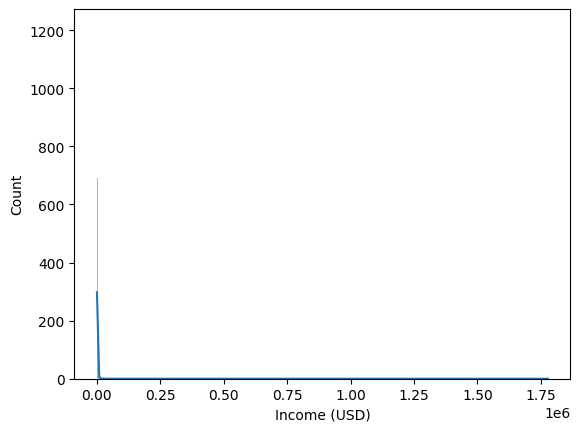

In [8]:
sns.histplot(train["Income (USD)"],kde=True)

In [9]:
median=train["Income (USD)"].median()

train["Income (USD)"]=train["Income (USD)"].fillna(value=median)

<Axes: xlabel='Income (USD)'>

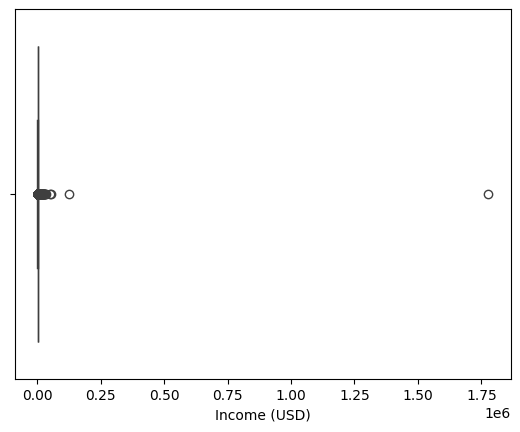

In [10]:
sns.boxplot(x=train['Income (USD)'])

In [11]:
from scipy.stats.mstats import winsorize
train['Income (USD)'] = winsorize(train['Income (USD)'], limits=[0.01, 0.01])

<Axes: xlabel='Income (USD)', ylabel='Count'>

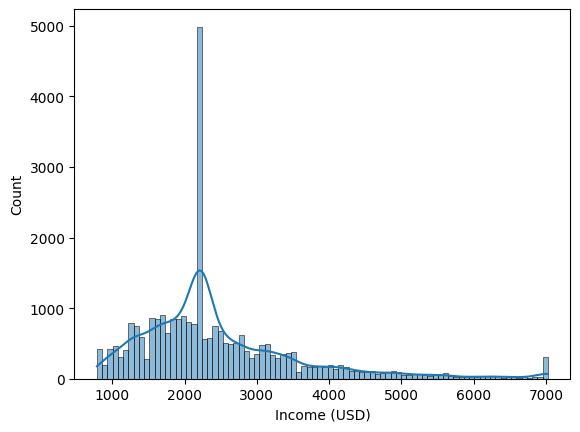

In [12]:
sns.histplot(train["Income (USD)"],kde=True)

In [13]:
train["Income (USD)"]=np.log1p(train["Income (USD)"])

<Axes: xlabel='Income (USD)', ylabel='Count'>

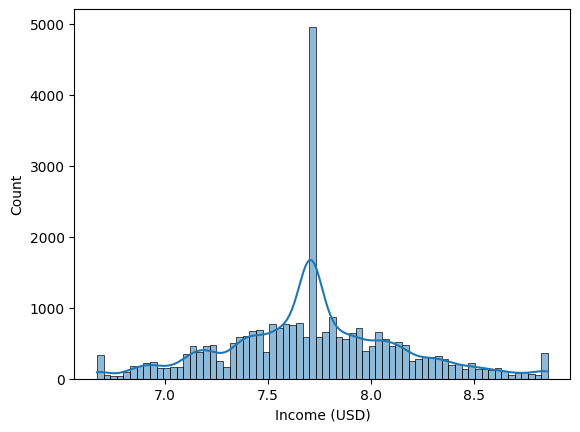

In [14]:
sns.histplot(train["Income (USD)"],kde=True)

In [15]:
"""
mean=train["Income (USD)"].mean()
std=train["Income (USD)"].std()
train["Income (USD)"]=(train["Income (USD)"]-mean)/std
sns.histplot(train["Income (USD)"],kde=True)
"""

'\nmean=train["Income (USD)"].mean()\nstd=train["Income (USD)"].std()\ntrain["Income (USD)"]=(train["Income (USD)"]-mean)/std\nsns.histplot(train["Income (USD)"],kde=True)\n'

**Income Stability**

In [16]:
print("Income Stability unique values: ",pd.unique(train["Income Stability"]))

mean=train.loc[train["Income Stability"]=="High","Income (USD)"].mean()
q1=train["Income (USD)"].quantile(0.25)
q3=train["Income (USD)"].quantile(0.75)
threshold=mean-(q3-q1)

mask=train["Income Stability"].isna()

train.loc[mask,"Income Stability"] = np.where(train.loc[mask,"Income (USD)"]>threshold,"High","Low")

print("Income Stability unique values: ",pd.unique(train["Income Stability"]))

Income Stability unique values:  ['Low' 'High' nan]
Income Stability unique values:  ['Low' 'High']


/home/nikhil/system-wide-env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/nikhil/system-wide-env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: xlabel='Income Stability', ylabel='count'>

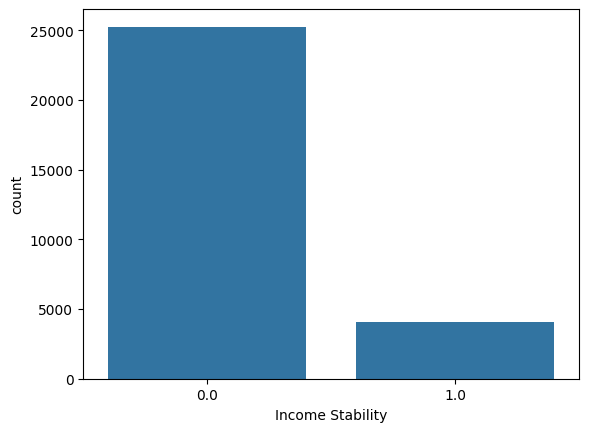

In [17]:
ordinal_encoder=OrdinalEncoder(categories=[['Low','High']])
train[["Income Stability"]]=ordinal_encoder.fit_transform(train[["Income Stability"]].astype(str))
sns.countplot(x="Income Stability",data=train)

**Current Loan Expenses**

In [18]:
train["Current Loan Expenses (USD)"].isnull().sum()

np.int64(163)

<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

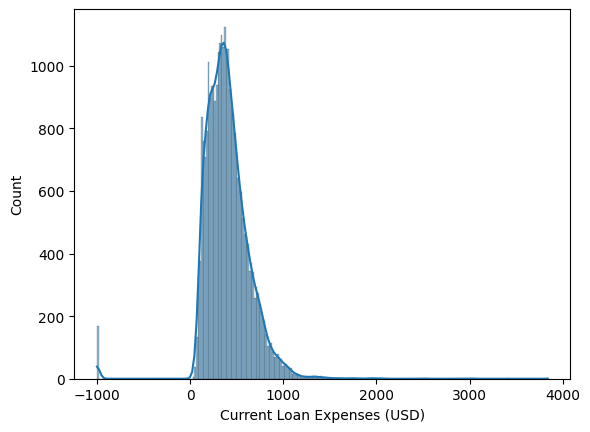

In [19]:
sns.histplot(train["Current Loan Expenses (USD)"],kde=True)

In [20]:

loan_data = train[train["Current Loan Expenses (USD)"].notnull()]

loan_data.groupby("Type of Employment")["Current Loan Expenses (USD)"].describe()

,count,mean,std,min,25%,50%,75%,max
Type of Employment,,,,,,,,
Accountants,1335.0,441.439655,249.210427,-999.00,280.8500,414.170,572.5250,1954.26
Cleaning staff,334.0,332.525898,216.363162,-999.00,218.3775,319.410,430.8375,1310.73
Cooking staff,547.0,357.907239,208.692967,-999.00,243.0000,346.900,459.3050,1141.01
Core staff,3133.0,393.631673,247.703840,-999.00,242.4900,369.630,518.9300,1954.03
Drivers,1560.0,427.985538,233.195427,-999.00,279.6800,408.090,548.2150,1695.76
HR staff,70.0,443.821429,199.346746,84.65,310.3725,420.065,576.8600,1040.20
High skill tech staff,1276.0,405.765674,259.903405,-999.00,247.5175,374.870,534.9650,1939.27
IT staff,75.0,395.331733,445.227159,-999.00,201.7750,345.440,494.3200,3018.15
Laborers,5418.0,379.649911,214.732117,-999.00,241.6125,362.565,491.1450,1502.59


In [21]:
groups = [group["Current Loan Expenses (USD)"].values
          for name, group in loan_data.groupby("Type of Employment")]

f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 37.30, p-value: 0.0000


In [22]:
group_medians = train.groupby("Type of Employment")["Current Loan Expenses (USD)"].median()

train["Current Loan Expenses (USD)"] = train.groupby("Type of Employment")["Current Loan Expenses (USD)"].transform(
    lambda x: x.fillna(x.median())
)

In [23]:
def fill_group_median(row):
    if pd.isnull(row["Current Loan Expenses (USD)"]):
        emp_type = row["Type of Employment"]
        return group_medians.get(emp_type, train["Current Loan Expenses (USD)"].median())
    else:
        return row["Current Loan Expenses (USD)"]

<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

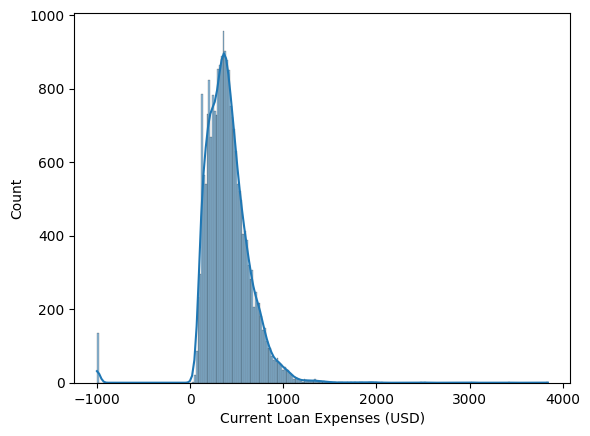

In [24]:
sns.histplot(train["Current Loan Expenses (USD)"],kde=True)

In [25]:
any(train["Current Loan Expenses (USD)"].isnull())

True

/home/nikhil/system-wide-env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

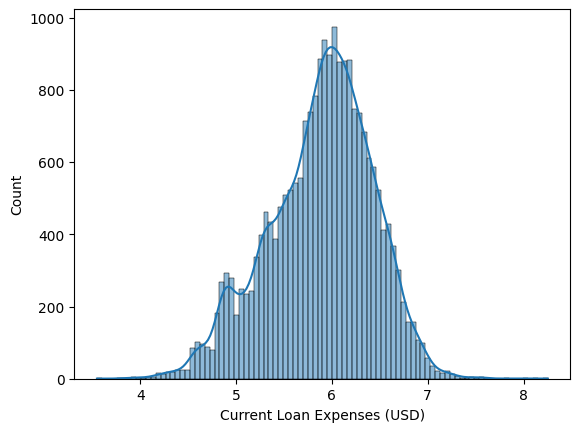

In [26]:
train["Current Loan Expenses (USD)"]=np.log1p(train["Current Loan Expenses (USD)"])
sns.histplot(train["Current Loan Expenses (USD)"],kde=True)

In [27]:
"""
max_=np.max(train["Current Loan Expenses (USD)"])
min_=np.min(train["Current Loan Expenses (USD)"])
train["Current Loan Expenses (USD)"]=(train["Current Loan Expenses (USD)"]-min_)/(max_-min_)
sns.histplot(train["Current Loan Expenses (USD)"],kde=True)
"""

'\nmax_=np.max(train["Current Loan Expenses (USD)"])\nmin_=np.min(train["Current Loan Expenses (USD)"])\ntrain["Current Loan Expenses (USD)"]=(train["Current Loan Expenses (USD)"]-min_)/(max_-min_)\nsns.histplot(train["Current Loan Expenses (USD)"],kde=True)\n'

**Credit Score**

In [28]:
print(np.max(train["Credit Score"]),np.min(train["Credit Score"]))

896.26 580.0


<Axes: xlabel='Credit Score', ylabel='Count'>

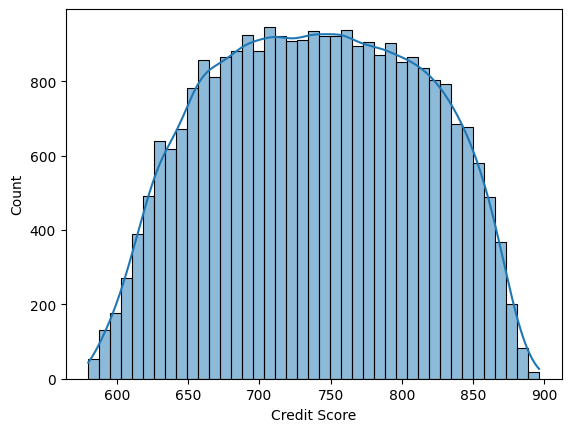

In [29]:
sns.histplot(train["Credit Score"],kde=True)

In [30]:
train["Credit Score"].fillna(inplace=True,value=train["Credit Score"].mean())

/tmp/ipykernel_8425/693064830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Credit Score"].fillna(inplace=True,value=train["Credit Score"].mean())


<Axes: xlabel='Credit Score', ylabel='Count'>

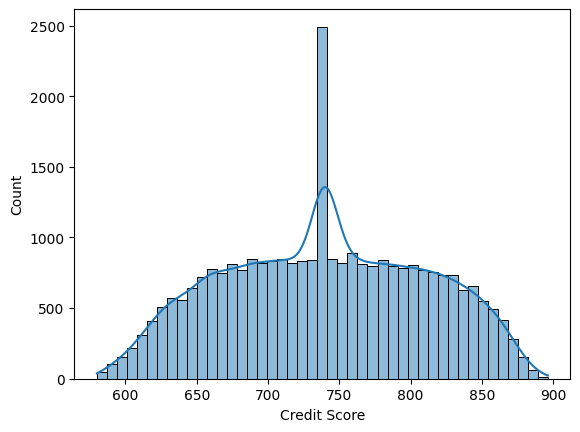

In [31]:
sns.histplot(train["Credit Score"],kde=True)

In [32]:
mean=train["Credit Score"].mean()
std=train["Credit Score"].std()

train["Credit Score"]=(train["Credit Score"]-mean)/std

<Axes: xlabel='Credit Score', ylabel='Count'>

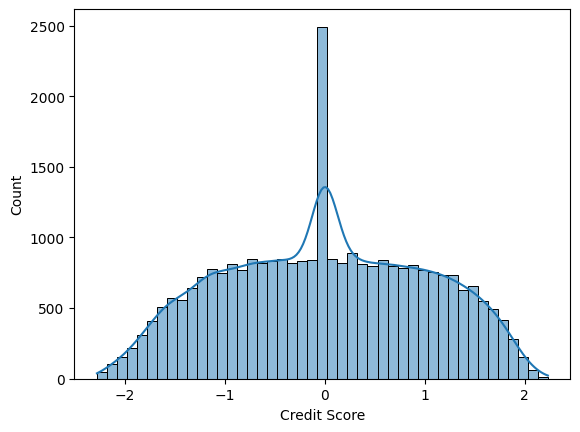

In [33]:
sns.histplot(train["Credit Score"],kde=True)

**Customer ID**

In [34]:
train=train.drop("Customer ID",axis=1)

**Name**

In [35]:
train=train.drop("Name",axis=1)

**Age**

<Axes: xlabel='Age', ylabel='Count'>

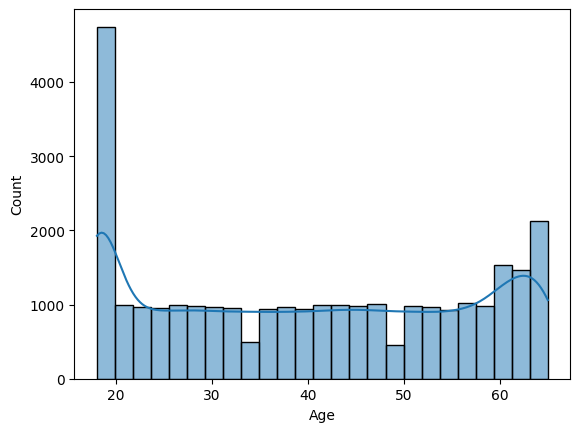

In [36]:
sns.histplot(train["Age"],kde=True)

In [37]:
scaler = MinMaxScaler()
train['Age'] = scaler.fit_transform(train[['Age']])

**Profession**

In [38]:
pd.unique(train["Profession"])

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [39]:
train=train.drop("Profession",axis=1)

**Location**

In [40]:
print(pd.unique(train["Location"]))

['Semi-Urban' 'Rural' 'Urban']


In [41]:
train=train.drop("Location",axis=1)


**Property ID**

In [42]:
train=train.drop("Property ID",axis=1)

**Current Loan Expenses**

<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

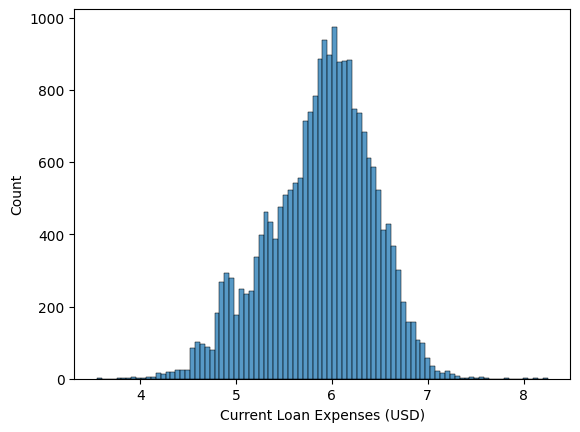

In [43]:
sns.histplot(train["Current Loan Expenses (USD)"])

In [44]:
mean=train["Current Loan Expenses (USD)"].mean(skipna=True)
std=train["Current Loan Expenses (USD)"].std(skipna=True)
train["Current Loan Expenses (USD)"]=train["Current Loan Expenses (USD)"].fillna(value=mean)
train["Current Loan Expenses (USD)"]=(train["Current Loan Expenses (USD)"]-mean)/std

<Axes: xlabel='Current Loan Expenses (USD)', ylabel='Count'>

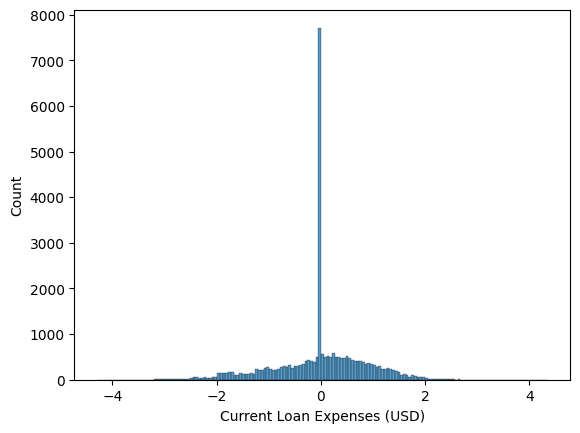

In [45]:
sns.histplot(train["Current Loan Expenses (USD)"])

**Property Value**

<Axes: xlabel='Property Price'>

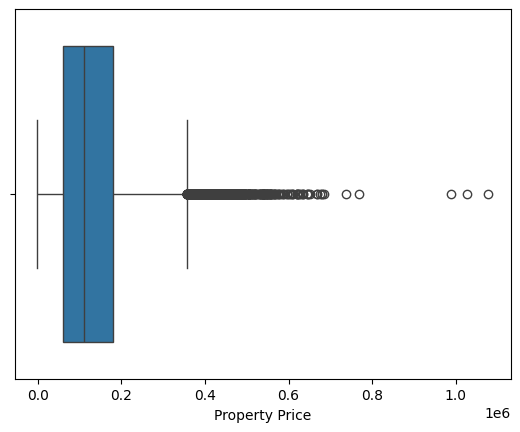

In [46]:
sns.boxplot(x=train["Property Price"])

In [47]:
train['Property Price'] = winsorize(train['Property Price'], limits=[0.01, 0.01])

<Axes: xlabel='Property Price', ylabel='Count'>

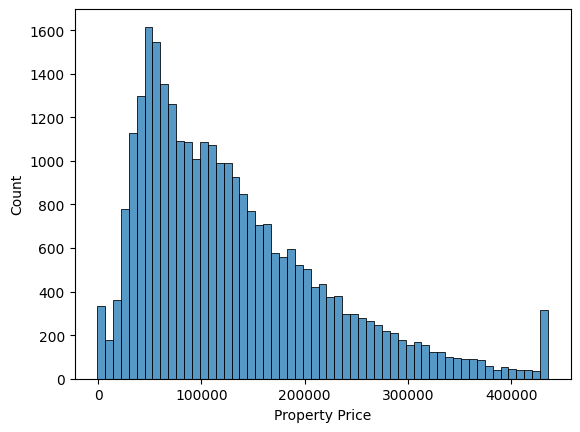

In [48]:
sns.histplot(train["Property Price"])

In [49]:
print((train["Property Price"] < -1).sum())

333


In [50]:
any(train["Property Price"].isnull())

False

/home/nikhil/system-wide-env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Property Price', ylabel='Count'>

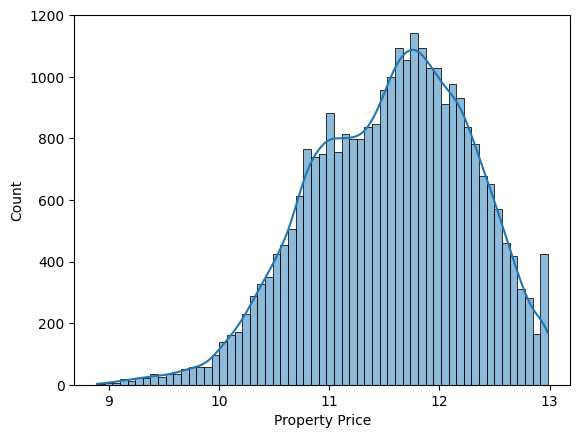

In [51]:
train["Property Price"]=np.log1p(train["Property Price"])
sns.histplot(train["Property Price"],kde=True)

In [52]:
print("Before:")
print(train["Property Price"].isnull().sum())       # Should be 0
print(train["Property Price"].describe())

Before:
333
count    28989.000000
mean        11.556972
std          0.722279
min          8.891092
25%         11.033904
50%         11.619639
75%         12.100952
max         12.984239
Name: Property Price, dtype: float64


/home/nikhil/system-wide-env/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4809: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: xlabel='Property Price', ylabel='Count'>

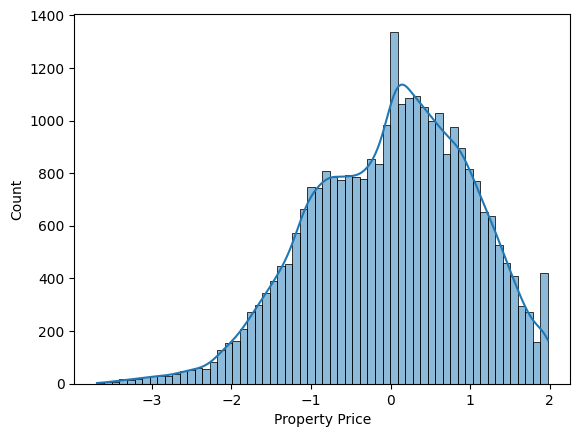

In [53]:
mean=train["Property Price"].mean()
std=train["Property Price"].std()
epsilon = 1e-8
train["Property Price"]=(train["Property Price"]-mean)/(std+epsilon)
train["Property Price"]=train["Property Price"].fillna(value=train["Property Price"].median())
sns.histplot(train["Property Price"],kde=True)

In [54]:
print("\nAfter:")
print(train["Property Price"].isnull().sum())       # This is showing 341?
print(train["Property Price"].describe())


After:
0
count    29322.000000
mean         0.000985
std          0.994348
min         -3.690929
25%         -0.714328
50%          0.086763
75%          0.744071
max          1.976060
Name: Property Price, dtype: float64


In [55]:
any(train["Property Price"].isnull())

False

In [56]:
def print_min_max(df, name="DataFrame"):
    print(f"--- {name} ---")
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            col_min = df[col].min()
            col_max = df[col].max()
            print(f"{col}: min = {col_min}, max = {col_max}")
        else:
            print(f"{col}: non-numeric (skipped)")
    print()

print_min_max(train, "Train")


--- Train ---
Age: min = 0.0, max = 0.9999999999999999
Income (USD): min = 6.669320409098969, max = 8.85756780385469
Income Stability: min = 0.0, max = 1.0
Type of Employment: non-numeric (skipped)
Loan Amount Request (USD): min = 6048.24, max = 621497.82
Current Loan Expenses (USD): min = -4.2956229049007915, max = 4.3566648587436445
Expense Type 1: non-numeric (skipped)
Expense Type 2: non-numeric (skipped)
Dependents: min = 1.0, max = 14.0
Credit Score: min = -2.2803733793833207, max = 2.2299212141522347
No. of Defaults: min = 0, max = 1
Has Active Credit Card: non-numeric (skipped)
Property Age: min = 377.7, max = 1777460.21
Property Type: min = 1, max = 4
Property Location: non-numeric (skipped)
Co-Applicant: min = -999, max = 1
Property Price: min = -3.690928570019701, max = 1.9760597471767214
Loan Sanction Amount (USD): min = 0.0, max = 481907.32



**Dropping Irrelevant Features**

In [57]:
train=train.drop("Property Age",axis=1)
train=train.drop("Property Location",axis=1)
train=train.drop("Co-Applicant",axis=1)
train=train.drop("Dependents",axis=1)
train=train.drop("Expense Type 1",axis=1)
train=train.drop("Expense Type 2",axis=1)
train=train.drop("Property Type",axis=1)
train=train.drop("Loan Amount Request (USD)",axis=1)
train=train.drop("Type of Employment",axis=1)
train=train.drop("No. of Defaults",axis=1)
train=train.drop("Has Active Credit Card",axis=1)

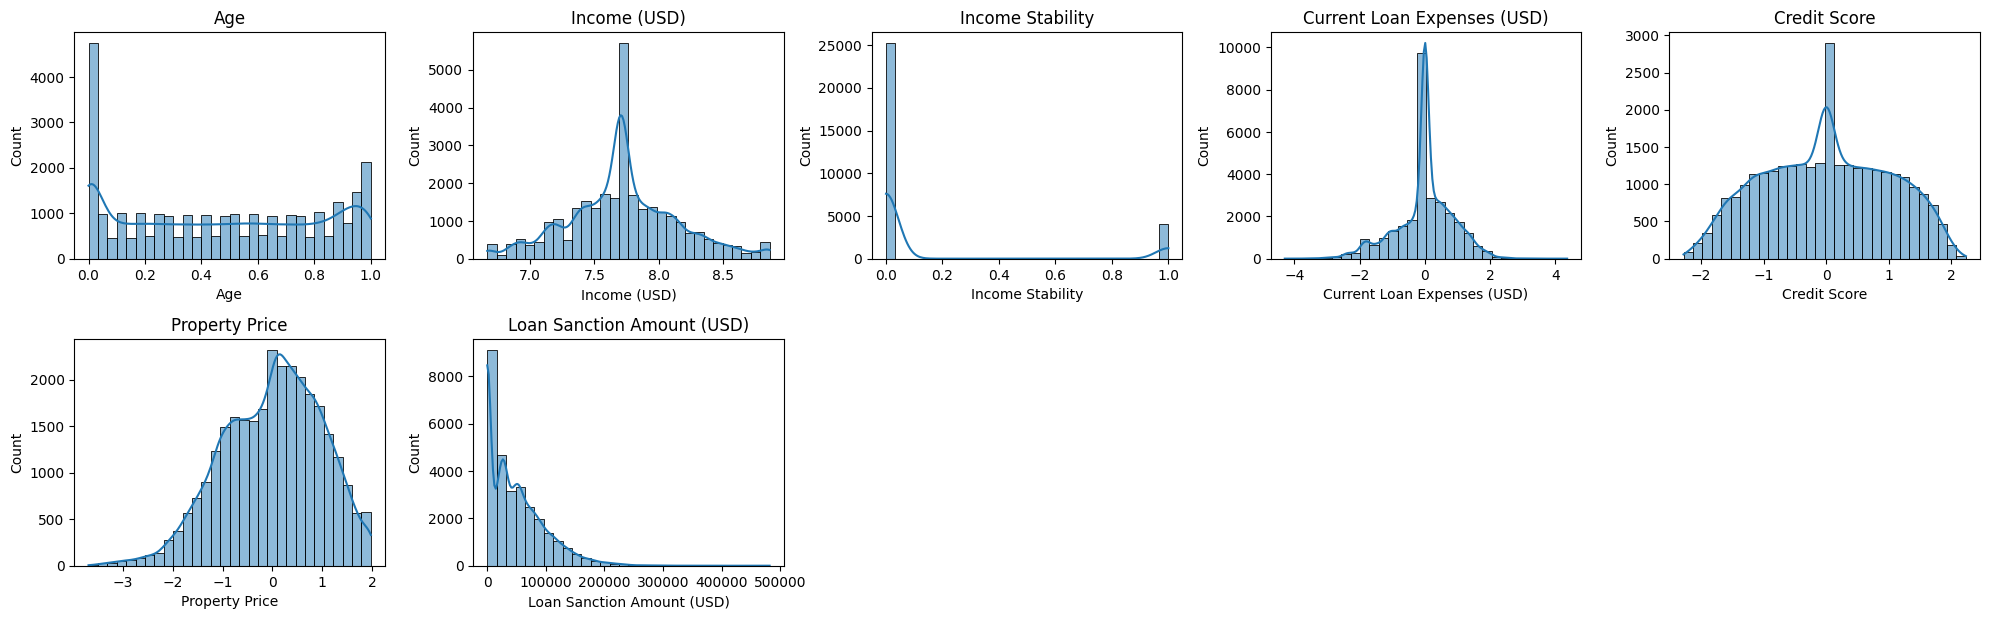

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train is a pandas DataFrame
num_features = train.shape[1]
cols = train.columns

# Define layout: 4 rows × 5 cols (to fit 17 plots)
n_rows = 4
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(cols):
    sns.histplot(train[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Correlation Matrix**

<Axes: >

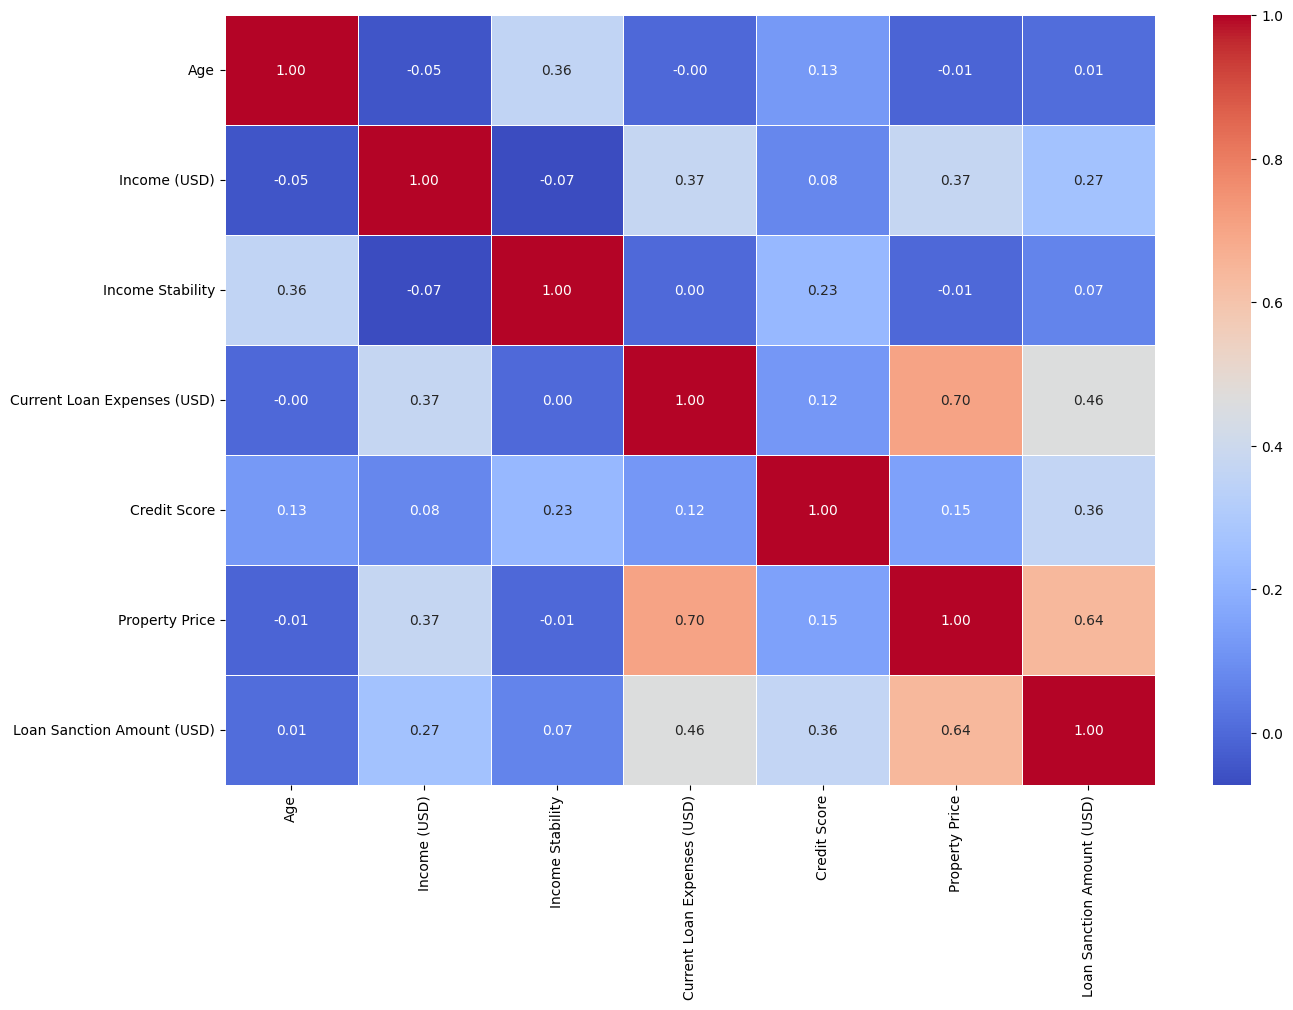

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [60]:
X=train.drop("Loan Sanction Amount (USD)",axis=1)
y=train["Loan Sanction Amount (USD)"]

In [61]:
X=X.drop("Current Loan Expenses (USD)",axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)
y_train_log = np.log1p(y_train)

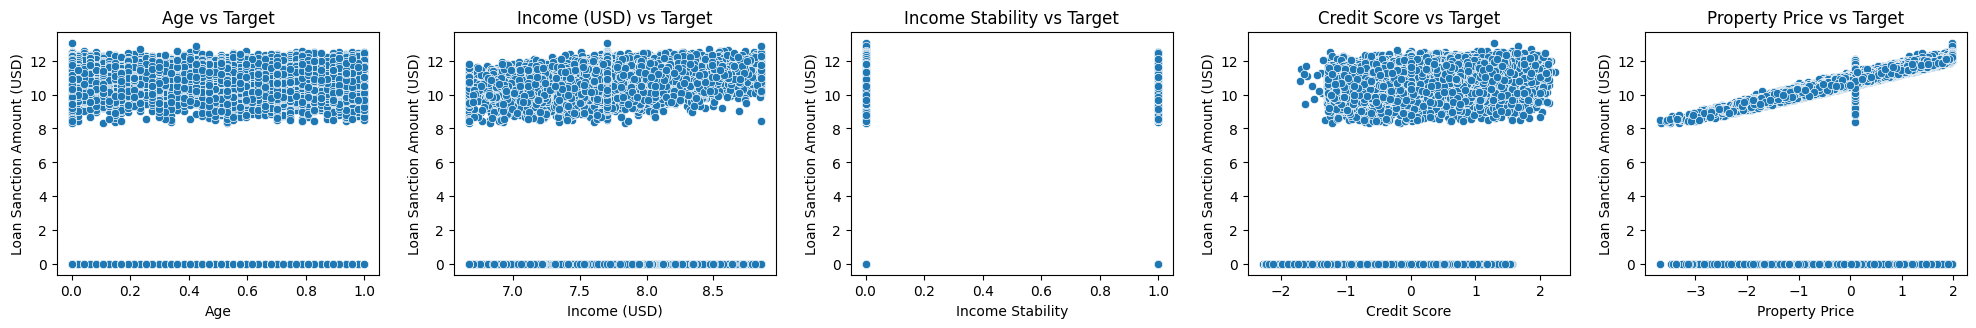

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_train.shape[1]
cols = X_train.columns

# Layout for subplots
n_rows = 4
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

# Plot each feature in its own subplot
for i, col in enumerate(cols):
    sns.scatterplot(x=X_train[col], y=y_train_log, ax=axes[i])
    axes[i].set_title(f'{col} vs Target')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score, KFold

model = LinearRegression()
r2_scores = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=5,shuffle=True,random_state=45), scoring='r2')  # 5-fold CV

mae_scores = cross_val_score(model, X_train, y_train,
                             cv=KFold(n_splits=5, shuffle=True, random_state=45),
                             scoring='neg_mean_absolute_error')

# MSE
mse_scores = cross_val_score(model, X_train, y_train,
                             cv=KFold(n_splits=5, shuffle=True, random_state=45),
                             scoring='neg_mean_squared_error')

# RMSE
rmse_scores = cross_val_score(model, X_train, y_train,
                              cv=KFold(n_splits=5, shuffle=True, random_state=45),
                              scoring='neg_root_mean_squared_error')

# Print results (make them positive)
print("Cross-validation R2 scores:", r2_scores)
print("Average R2:", r2_scores.mean())
n = X_train.shape[0]
p = X_train.shape[1]
adj_r2 = 1 - (1 - r2_scores.mean()) * (n - 1) / (n - p - 1)
print("Adjusted Average R2:", adj_r2)

print("MAE: ",mae_scores)
print("Average MAE:", -mae_scores.mean())

print("MSE: ",mse_scores)
print("Average MSE:", -mse_scores.mean())

print("RMSE: ",rmse_scores)
print("Average RMSE:", -rmse_scores.mean())

Cross-validation R2 scores: [0.48811408 0.50256285 0.46853302 0.48146682 0.48751378]
Average R2: 0.48563811090875825
Adjusted Average R2: 0.4855127729563503
MAE:  [-24477.58256196 -24495.68131839 -24444.79915058 -24051.47677946
 -24595.46323236]
Average MAE: 24413.000608551447
MSE:  [-1.18308045e+09 -1.21523723e+09 -1.21099877e+09 -1.21523772e+09
 -1.20146566e+09]
Average MSE: 1205203967.7842257
RMSE:  [-34395.93656064 -34860.25287489 -34799.40764159 -34860.25993971
 -34662.1646939 ]
Average RMSE: 34715.60434214466


In [65]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

r2=r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("R2-Score: ", r2)
print("Adjusted R2-Score: ",adj_r2)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))


R2-Score:  0.4821427259368155
Adjusted R2-Score:  0.48201653624090846
Mean Squared Error:  1178823927.0646117
Root Mean Squared Error:  34334.00540374822
Mean Absolute Error:  24237.88710741352


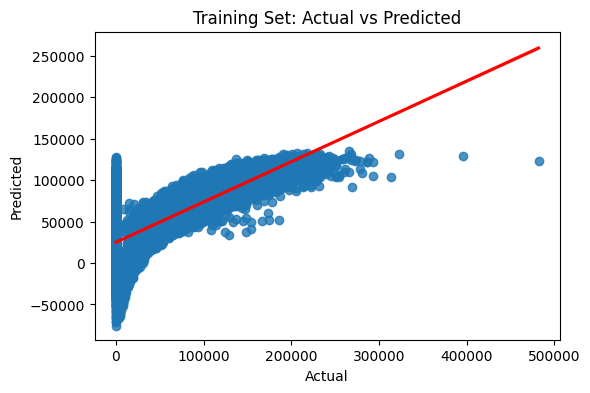

In [67]:
plt.figure(figsize=(6, 4))
sns.regplot(x=y_train, y=model.predict(X_train), line_kws={'color': 'red'})
plt.title("Training Set: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

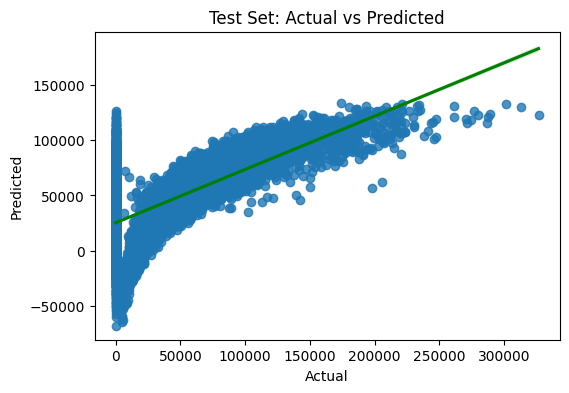

In [68]:
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=model.predict(X_test), line_kws={'color': 'green'})
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

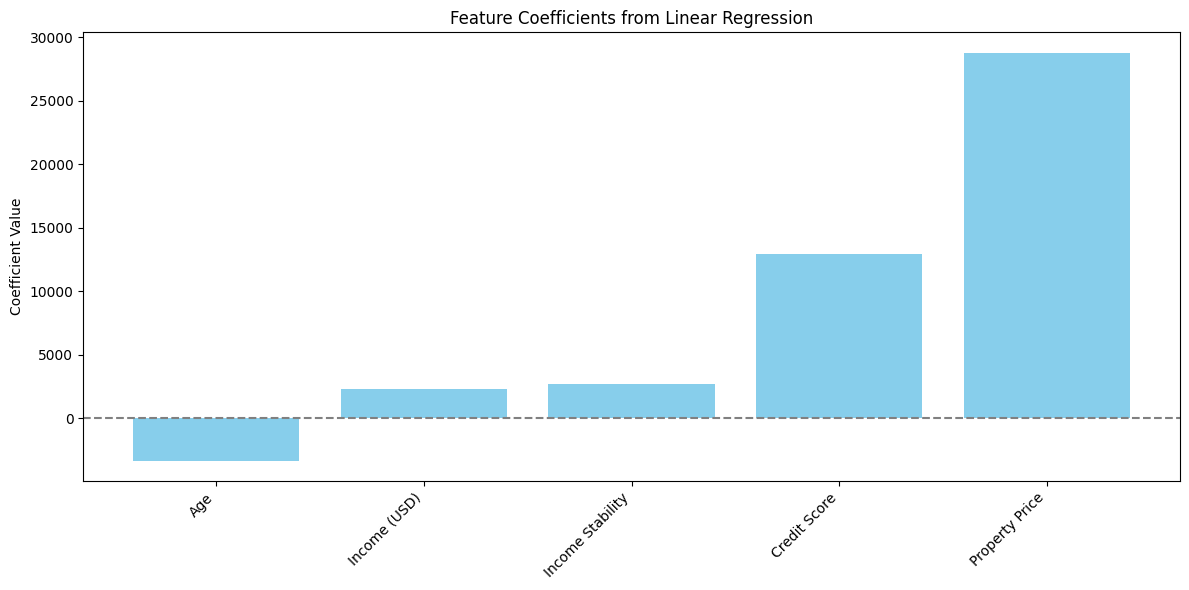

In [69]:
feature_names = X_train.columns
coefficients = model.coef_

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_names, coefficients, color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title("Feature Coefficients from Linear Regression")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

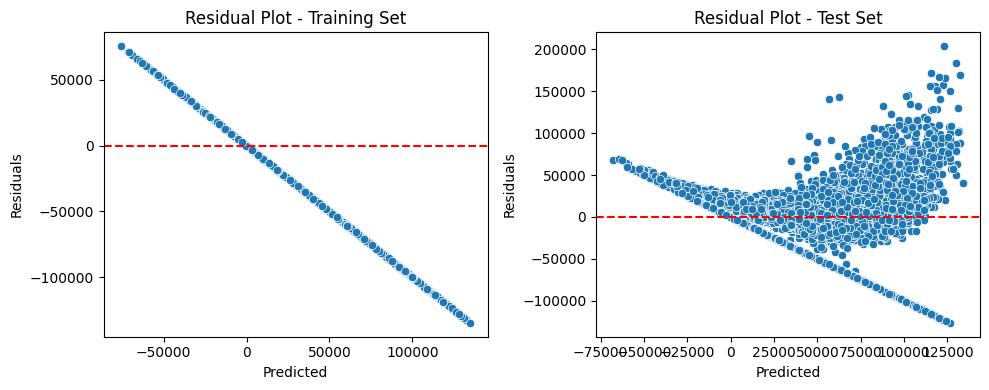

In [70]:
# Training Residuals
y_train_pred = model.predict(X_train)
train_residuals = y_train_log - y_train_pred

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=train_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

# Test Residuals
y_test_pred = model.predict(X_test)
test_residuals = y_test - y_test_pred

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

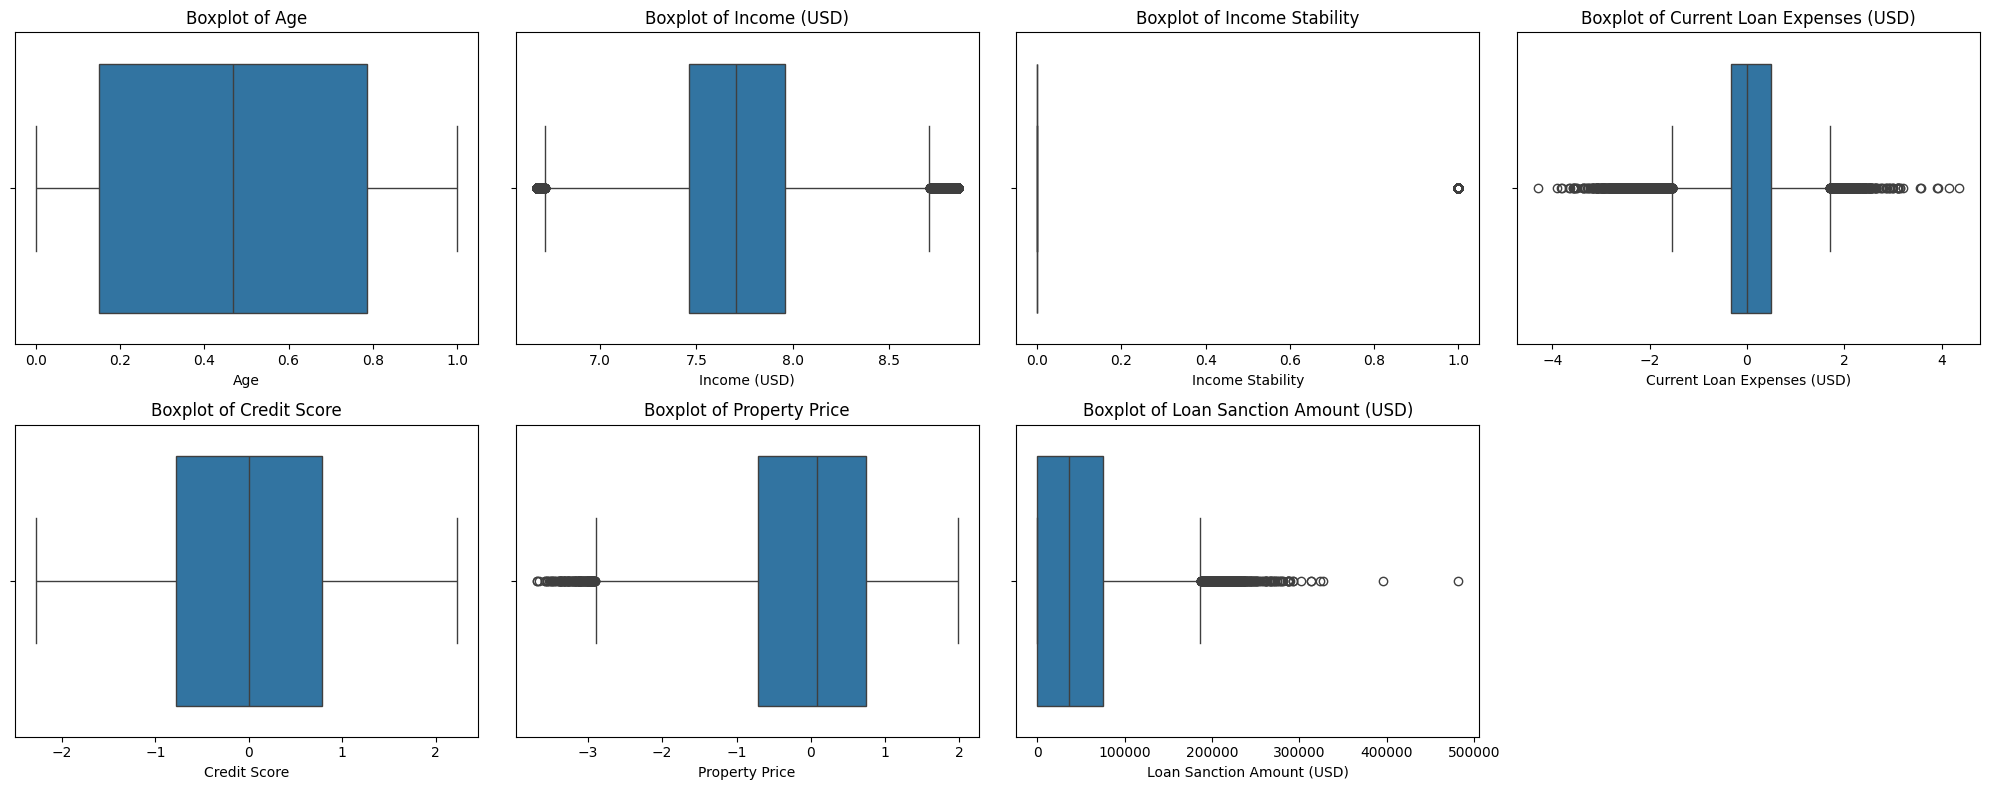

In [72]:
import math

dataset=train

n = len(dataset.columns)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(dataset.columns):
    sns.boxplot(data=dataset, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(n, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


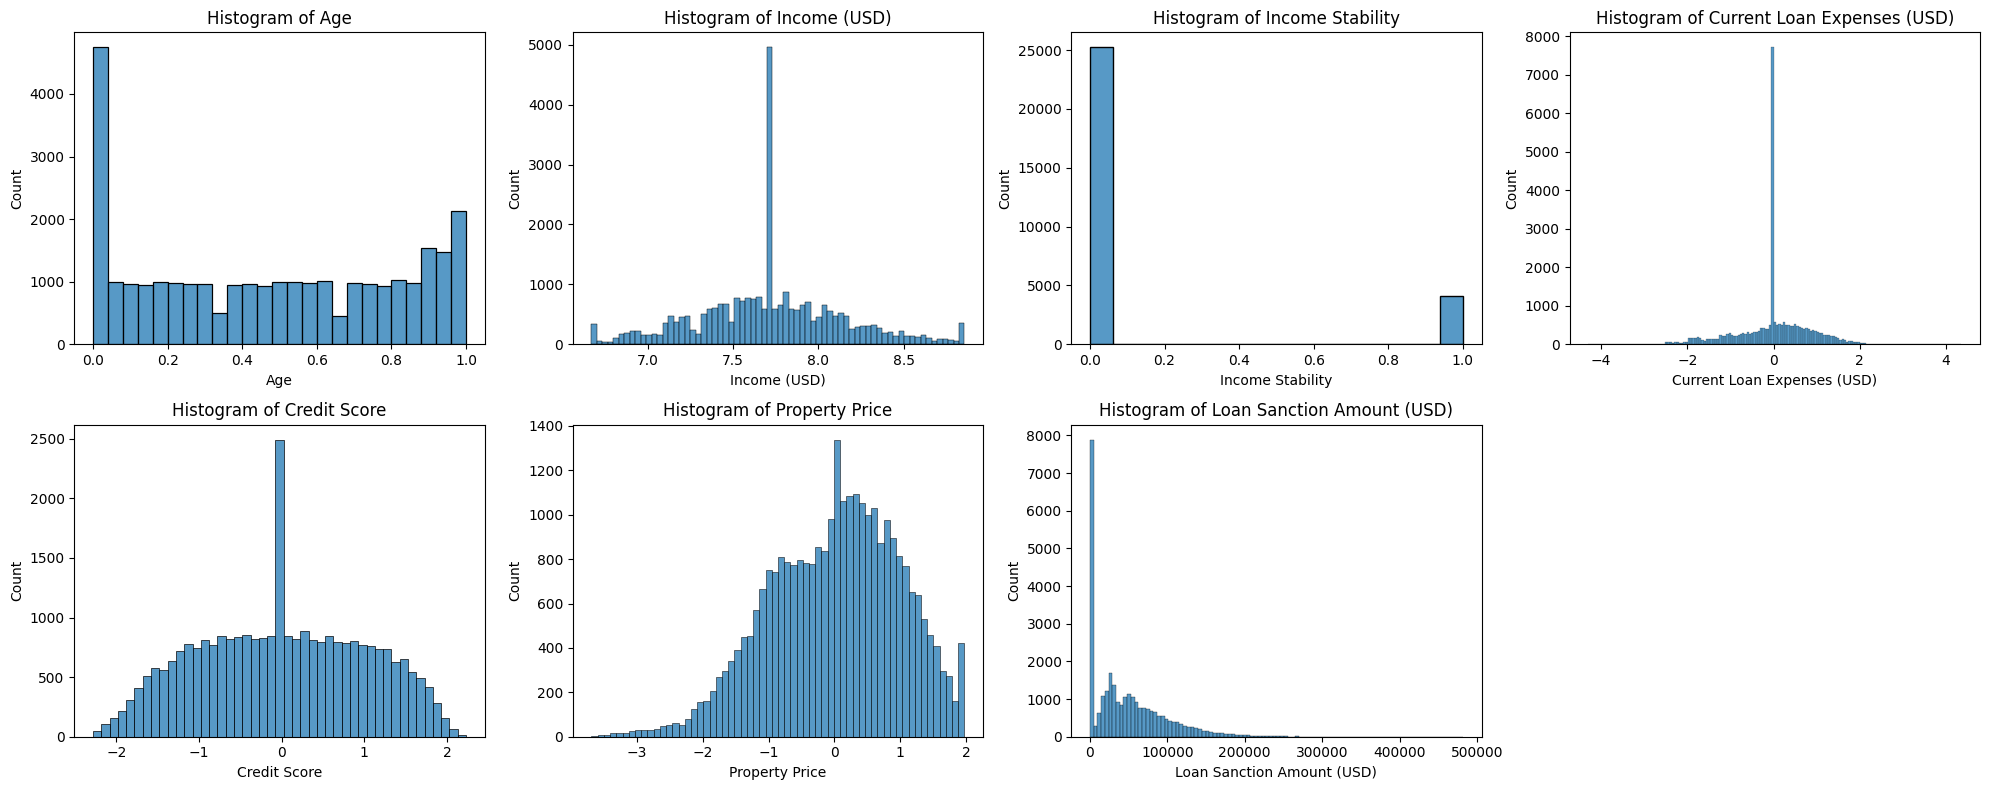

In [73]:
n = len(dataset.columns)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(dataset.columns):
    sns.histplot(data=dataset, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# Hide any unused subplots
for j in range(n, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# R² Scores
print("Ridge Train R²:", r2_score(y_train, y_train_pred_ridge))
print("Ridge Test R² :", r2_score(y_test, y_test_pred_ridge))


Ridge Train R²: 0.4863723303008308
Ridge Test R² : 0.4821427263431636


In [75]:
from sklearn.linear_model import Lasso

# Train Lasso Regression
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# R² Scores
print("Lasso Train R²:", r2_score(y_train, y_train_pred_lasso))
print("Lasso Test R² :", r2_score(y_test, y_test_pred_lasso))


Lasso Train R²: 0.48637233133016056
Lasso Test R² : 0.48214251057017254


In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_poly=model.predict(X_test_poly)
print(r2_score(y_test,y_pred_poly))

0.5809819997663073


MAE: 19399.18199178495
MSE: 904224652.8831505
RMSE: 30070.328446545947
R² Score: 0.6027741691256561


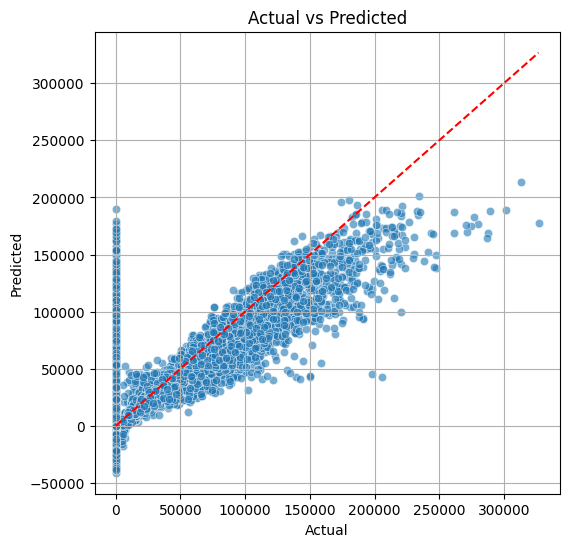

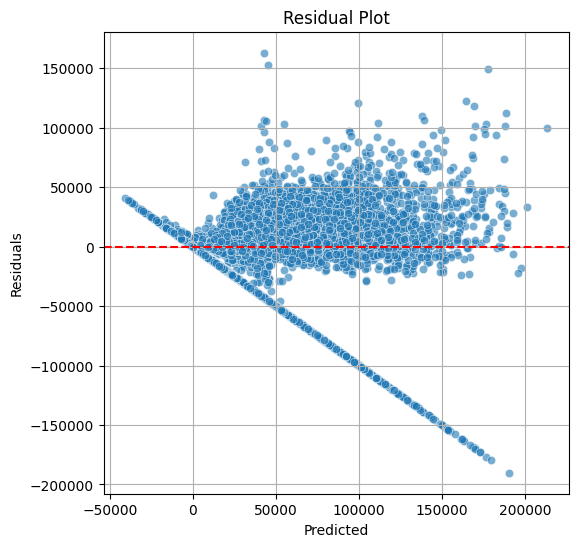

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Model
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)

# --- METRICS ---
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# --- PLOTS ---

# 1. Actual vs Predicted Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred_poly
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_pred_poly, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


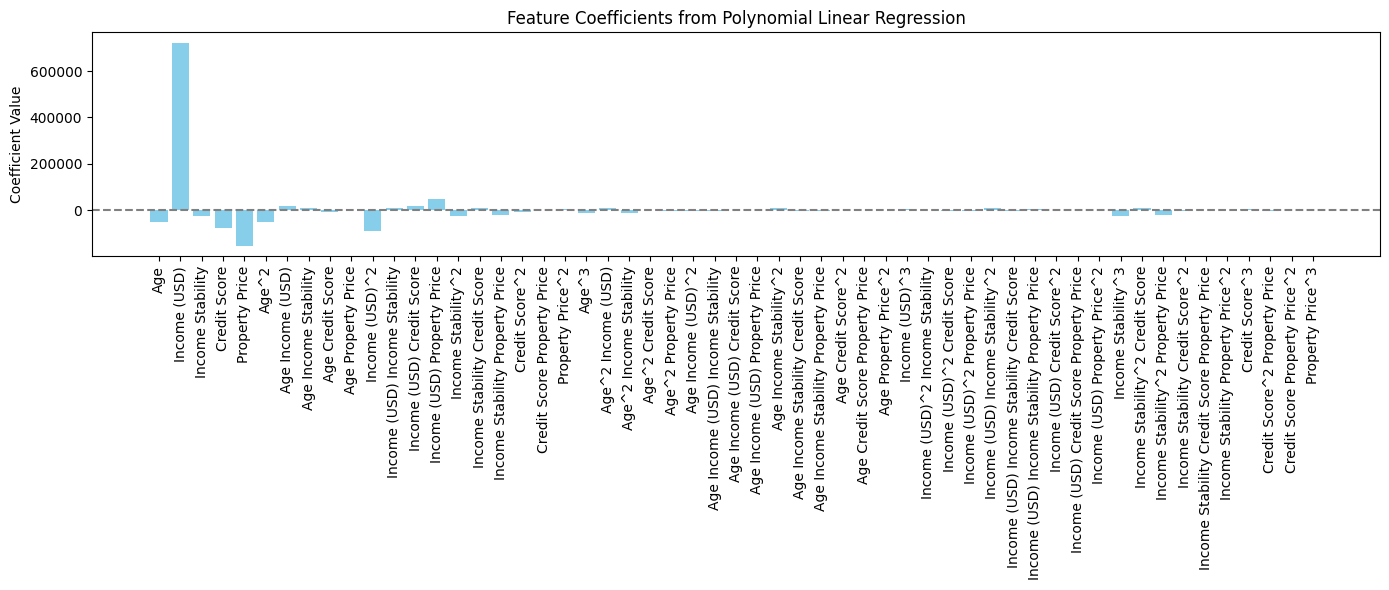

In [78]:
# Get the feature names after polynomial transformation
feature_names = poly.get_feature_names_out(X_train.columns)

# Fit the model (already done by you)
coefficients = model.coef_

# Plotting
plt.figure(figsize=(14, 6))
bars = plt.bar(feature_names, coefficients, color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=90)
plt.title("Feature Coefficients from Polynomial Linear Regression")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [79]:
from sklearn.pipeline import make_pipeline
# Create a pipeline with polynomial transformation + linear regression
degree = 3
pipeline = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                         LinearRegression())

# 5-fold cross-validation (you can change to 10 if needed)
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R2 Scores: {scores}")
print(f"Mean R2 Score: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Cross-Validation R2 Scores: [0.58910633 0.64260949 0.58825507 0.59178828 0.60748881]
Mean R2 Score: 0.6038
Standard Deviation: 0.0206


In [80]:
from sklearn.model_selection import cross_validate


scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

print(cv_results["test_r2"])
print(f"Mean R2: {cv_results['test_r2'].mean():.4f}")
print(cv_results["test_neg_mean_absolute_error"])
print(f"Mean MAE: {-cv_results['test_neg_mean_absolute_error'].mean():.4f}")
print(cv_results["test_neg_mean_squared_error"])
print(f"Mean MSE: {-cv_results['test_neg_mean_squared_error'].mean():.4f}")

[0.58910633 0.64260949 0.58825507 0.59178828 0.60748881]
Mean R2: 0.6038
[-19811.96545968 -19332.46626594 -19529.0066163  -19344.41038134
 -19551.47909196]
Mean MAE: 19513.8656
[-9.54992528e+08 -8.74995350e+08 -9.53276302e+08 -9.26771952e+08
 -9.27119754e+08]
Mean MSE: 927431177.1974
